In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Poverty Data.csv')
labl = pd.read_csv('/content/Poverty Labels.csv')

In [ ]:
print('df_shape:', df.shape)
print('labl_shape:', labl.shape)

df_shape: (3198, 34)
labl_shape: (3198, 2)


In [ ]:
df.head(5)

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,0.378,0.056,0.000,0.223896,0.345382,0.273092,0.157631,10.0,11.0,0.345,0.219,0.159,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b
1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,0.954,0.002,0.018,0.113524,0.484699,0.235933,0.165844,12.0,11.0,0.296,0.222,0.123,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b
2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,0.428,0.009,0.008,0.236346,0.309831,0.315789,0.138034,10.0,11.0,0.267,NaN,0.092,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,0.916,0.043,0.002,0.091365,0.388554,0.349398,0.170683,7.0,13.0,0.272,0.293,0.084,0.100,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b
4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,0.294,0.011,0.149,0.171598,0.266272,0.190335,0.371795,15.0,6.0,0.232,0.165,0.080,0.086,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a


In [ ]:
labl.head(5)

,row_id,poverty_rate
0,0,22.6
1,2,17.3
2,4,24.4
3,5,16.4
4,8,17.4


In [ ]:
df.isnull().sum()

row_id                                                 0
area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_scho

In [ ]:
index = df.index
cols_missing = ['econ__pct_uninsured_adults', 'econ__pct_uninsured_children', 'demo__pct_female', 'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american',
        'demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian', 'health__pct_adult_obesity',
        'health__pct_adult_smoking', 'health__pct_diabetes', 'health__pct_low_birthweight','health__pct_excessive_drinking','health__pct_physical_inacticity','health__air_pollution_particulate_matter',
        'health__homicides_per_100k','health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist','health__pop_per_primary_care_physician']
missing = df[cols_missing].apply(lambda x: x.isnull().sum()/len(index))*100
missing

econ__pct_uninsured_adults                      0.062539
econ__pct_uninsured_children                    0.062539
demo__pct_female                                0.062539
demo__pct_below_18_years_of_age                 0.062539
demo__pct_aged_65_years_and_older               0.062539
demo__pct_hispanic                              0.062539
demo__pct_non_hispanic_african_american         0.062539
demo__pct_non_hispanic_white                    0.062539
demo__pct_american_indian_or_alaskan_native     0.062539
demo__pct_asian                                 0.062539
health__pct_adult_obesity                       0.062539
health__pct_adult_smoking                      14.509068
health__pct_diabetes                            0.062539
health__pct_low_birthweight                     5.691057
health__pct_excessive_drinking                 30.581614
health__pct_physical_inacticity                 0.062539
health__air_pollution_particulate_matter        0.875547
health__homicides_per_100k     

health__pct_excessive_drinking, health__homicides_per_100k have more than 20% missing values. Therefore, those two fetaures were ignored.

In [ ]:
df1 = labl.drop(columns=['row_id'])
df_full = pd. concat([df,df1], axis =1)
df_full.shape

(3198, 35)

In [ ]:
df_full.columns

Index(['row_id', 'area__rucc', 'area__urban_influence',
       'econ__economic_typology', 'econ__pct_civilian_labor',
       'econ__pct_unemployment', 'econ__pct_uninsured_adults',
       'econ__pct_uninsured_children', 'demo__pct_female',
       'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older',
       'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_with_some_college',
       'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k', 'health__pct_adult_obesity',
       'health__pct_adult_smoking', 'health__pct_diabetes',
       'health__pct_low_birthweight', 'health__pct_excessive_drinking',
       'health__pct_physical_inacticity',
       'health__air_pollution_

In [ ]:
df_full.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate
0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,0.378,0.056,0.000,0.223896,0.345382,0.273092,0.157631,10.0,11.0,0.345,0.219,0.159,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b,22.6
1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,0.954,0.002,0.018,0.113524,0.484699,0.235933,0.165844,12.0,11.0,0.296,0.222,0.123,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b,17.3
2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,0.428,0.009,0.008,0.236346,0.309831,0.315789,0.138034,10.0,11.0,0.267,NaN,0.092,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b,24.4
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,0.916,0.043,0.002,0.091365,0.388554,0.349398,0.170683,7.0,13.0,0.272,0.293,0.084,0.100,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b,16.4
4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,0.294,0.011,0.149,0.171598,0.266272,0.190335,0.371795,15.0,6.0,0.232,0.165,0.080,0.086,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a,17.4


In [ ]:
df_full.to_csv('NJ_Food_Bank.csv')
from google.colab import files
files.download('NJ_Food_Bank.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_full = df_full.drop(columns=['health__pct_excessive_drinking', 'health__homicides_per_100k'])
df_full.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate
0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,0.378,0.056,0.000,0.223896,0.345382,0.273092,0.157631,10.0,11.0,0.345,0.219,0.159,0.154,0.317,12.0,33.75,5429.0,6949.0,b,22.6
1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,0.954,0.002,0.018,0.113524,0.484699,0.235933,0.165844,12.0,11.0,0.296,0.222,0.123,0.080,0.350,14.0,23.81,3060.0,1749.0,b,17.3
2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,0.428,0.009,0.008,0.236346,0.309831,0.315789,0.138034,10.0,11.0,0.267,NaN,0.092,0.079,0.259,10.0,NaN,690.0,NaN,b,24.4
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,0.916,0.043,0.002,0.091365,0.388554,0.349398,0.170683,7.0,13.0,0.272,0.293,0.084,0.100,0.249,11.0,23.11,1430.0,1160.0,b,16.4
4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,0.294,0.011,0.149,0.171598,0.266272,0.190335,0.371795,15.0,6.0,0.232,0.165,0.080,0.086,0.253,11.0,3.68,1700.0,1870.0,a,17.4


In [ ]:
df_full.shape

(3198, 33)

In [ ]:
df_full.isnull().sum()

row_id                                                0
area__rucc                                            0
area__urban_influence                                 0
econ__economic_typology                               0
econ__pct_civilian_labor                              0
econ__pct_unemployment                                0
econ__pct_uninsured_adults                            2
econ__pct_uninsured_children                          2
demo__pct_female                                      2
demo__pct_below_18_years_of_age                       2
demo__pct_aged_65_years_and_older                     2
demo__pct_hispanic                                    2
demo__pct_non_hispanic_african_american               2
demo__pct_non_hispanic_white                          2
demo__pct_american_indian_or_alaskan_native           2
demo__pct_asian                                       2
demo__pct_adults_less_than_a_high_school_diploma      0
demo__pct_adults_with_high_school_diploma       

In [ ]:
cols = ['econ__pct_uninsured_adults', 'econ__pct_uninsured_children', 'demo__pct_female', 
        'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older',
        'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american', 'demo__pct_non_hispanic_white', 
        'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian','health__pct_adult_obesity', 
        'health__pct_adult_smoking', 'health__pct_diabetes', 'health__pct_low_birthweight', 
        'health__pct_physical_inacticity','health__air_pollution_particulate_matter',
        'health__motor_vehicle_crash_deaths_per_100k', 'health__pop_per_dentist', 
        'health__pop_per_primary_care_physician' ]


In [ ]:
df_full[cols] = df[cols].apply(lambda x: x.fillna(x.median()), axis =0)

In [ ]:
df_full.isnull().sum()

row_id                                              0
area__rucc                                          0
area__urban_influence                               0
econ__economic_typology                             0
econ__pct_civilian_labor                            0
econ__pct_unemployment                              0
econ__pct_uninsured_adults                          0
econ__pct_uninsured_children                        0
demo__pct_female                                    0
demo__pct_below_18_years_of_age                     0
demo__pct_aged_65_years_and_older                   0
demo__pct_hispanic                                  0
demo__pct_non_hispanic_african_american             0
demo__pct_non_hispanic_white                        0
demo__pct_american_indian_or_alaskan_native         0
demo__pct_asian                                     0
demo__pct_adults_less_than_a_high_school_diploma    0
demo__pct_adults_with_high_school_diploma           0
demo__pct_adults_with_some_c

In [ ]:
df_full.econ__economic_typology.value_counts()

Nonspecialized                        1266
Manufacturing-dependent                494
Farm-dependent                         482
Federal/State government-dependent     390
Recreation                             312
Mining-dependent                       254
Name: econ__economic_typology, dtype: int64

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df_full)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cat_cols = [
'area__rucc',
'econ__economic_typology']

In [ ]:
df_full.area__rucc.value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         608
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    484
Metro - Counties in metro areas of 1 million population or more                                  436
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     418
Metro - Counties in metro areas of 250,000 to 1 million population                               370
Metro - Counties in metro areas of fewer than 250,000 population                                 322
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        238
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          222
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                      100
Name: area__rucc, dtype: int64

In [ ]:
df_full.area__rucc = df_full.area__rucc.replace(['Metro - Counties in metro areas of 1 million population or more', 'Metro - Counties in metro areas of 250,000 to 1 million population', 'Metro - Counties in metro areas of fewer than 250,000 population'], 'Metro')
df_full.area__rucc = df_full.area__rucc.replace(['Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area', 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area', 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'], 'Metro-Nonmetro')
df_full.area__rucc = df_full.area__rucc.replace(['Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area', 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area', 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area'], 'Nonmetro')
df_full.area__rucc.value_counts()

Metro             1128
Metro-Nonmetro    1068
Nonmetro          1002
Name: area__rucc, dtype: int64

In [ ]:
df_full.area__urban_influence.value_counts()

Small-in a metro area with fewer than 1 million residents                                             692
Large-in a metro area with at least 1 million residents or more                                       436
Noncore adjacent to a small metro with town of at least 2,500 residents                               346
Micropolitan adjacent to a small metro area                                                           262
Micropolitan not adjacent to a metro area                                                             254
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    210
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                210
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          206
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             176
Noncore adjacent to a large metro area        

In [ ]:
df_full.area__urban_influence.value_counts().sum()

3198

Metro, Noncore-Metro, Noncore-Micro, Noncore-not_Metro/Micro, Micropolitan-Metro,Micropolitan-not_Metro/Micro, 

In [ ]:
df_full.area__urban_influence = df_full.area__urban_influence.replace(['Small-in a metro area with fewer than 1 million residents', 'Large-in a metro area with at least 1 million residents or more'], 'metro')
df_full.area__urban_influence = df_full.area__urban_influence.replace(['Noncore adjacent to a small metro with town of at least 2,500 residents', 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents', 'Noncore adjacent to a large metro area'], 'Noncore-Metro')
df_full.area__urban_influence = df_full.area__urban_influence.replace(['Noncore adjacent to micro area and does not contain a town of at least 2,500 residents', 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents'], 'Noncore-Micro')
df_full.area__urban_influence = df_full.area__urban_influence.replace(['Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents', 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents'], 'Noncore-not_Metro/Micro')
df_full.area__urban_influence = df_full.area__urban_influence.replace(['Micropolitan adjacent to a small metro area', 'Micropolitan adjacent to a large metro area'], 'Micropolitan-Metro')
df_full.area__urban_influence = df_full.area__urban_influence.replace(['Micropolitan not adjacent to a metro area'], 'Micropolitan-not_Metro')
df_full.area__urban_influence.value_counts()

metro                      1128
Noncore-Metro               680
Noncore-Micro               416
Micropolitan-Metro          388
Noncore-not_Metro/Micro     332
Micropolitan-not_Metro      254
Name: area__urban_influence, dtype: int64

In [ ]:
df_full.area__urban_influence.value_counts().sum()

3198

In [ ]:
df_full = df_full.drop(columns=['area__urban_influence','row_id', 'health__air_pollution_particulate_matter','yr'], axis =1)
df_full.head()

,area__rucc,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_physical_inacticity,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,poverty_rate
0,Metro-Nonmetro,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,0.378,0.056,0.000,0.223896,0.345382,0.273092,0.157631,10.0,11.0,0.345,0.219,0.159,0.154,0.317,33.75,5429.0,6949.0,22.6
1,Metro-Nonmetro,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,0.954,0.002,0.018,0.113524,0.484699,0.235933,0.165844,12.0,11.0,0.296,0.222,0.123,0.080,0.350,23.81,3060.0,1749.0,17.3
2,Nonmetro,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,0.428,0.009,0.008,0.236346,0.309831,0.315789,0.138034,10.0,11.0,0.267,0.211,0.092,0.079,0.259,19.63,690.0,1999.0,24.4
3,Nonmetro,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,0.916,0.043,0.002,0.091365,0.388554,0.349398,0.170683,7.0,13.0,0.272,0.293,0.084,0.100,0.249,23.11,1430.0,1160.0,16.4
4,Metro,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,0.294,0.011,0.149,0.171598,0.266272,0.190335,0.371795,15.0,6.0,0.232,0.165,0.080,0.086,0.253,3.68,1700.0,1870.0,17.4


Text(0.5, 1.0, 'Correlation Heatmap')

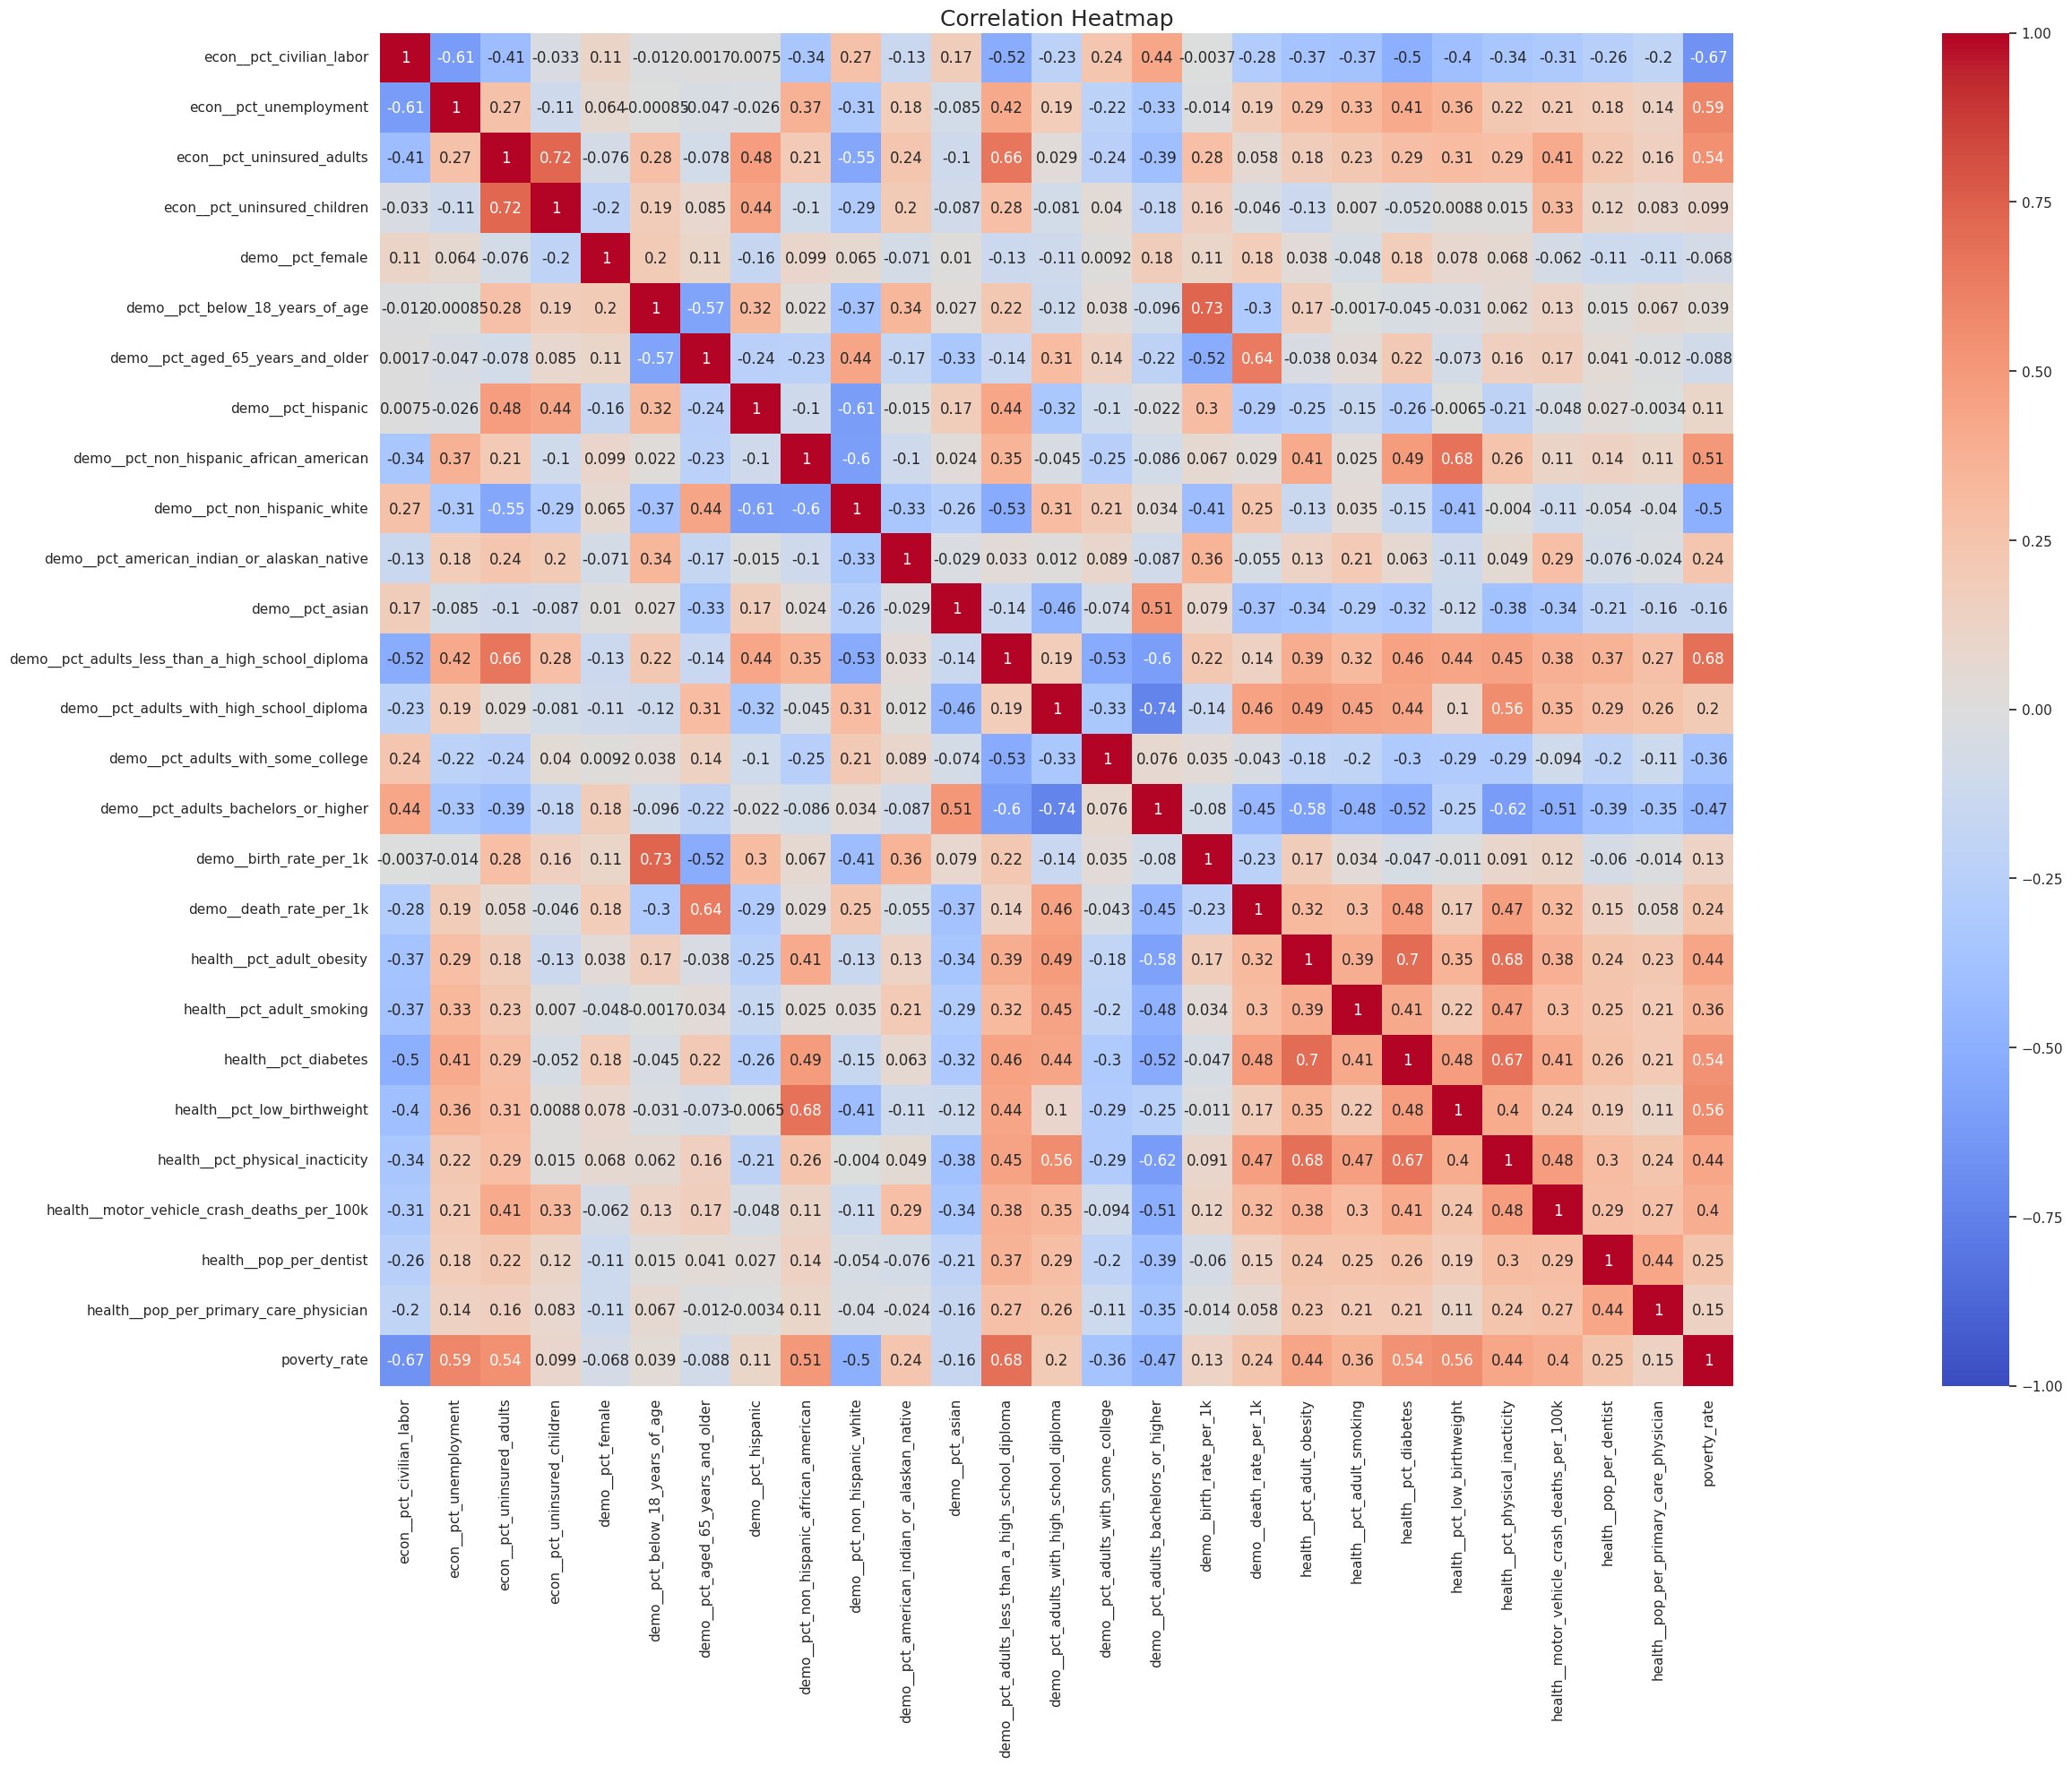

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(60,20))
corr = df_full.corr()
sns.set_theme(style ='white')
heat_map = sns.heatmap(corr,vmin = -1, vmax = 1, square = True, annot = True, cmap = 'coolwarm')
heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':18} )

In [ ]:
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [ ]:
from pycaret.anomaly import *

In [ ]:
anomaly_model = setup(df_full)

In [ ]:
knn = create_model('knn')

In [ ]:
knn_predictions = predict_model(knn, data = df_full)
knn_predictions

,area__rucc,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_physical_inacticity,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,poverty_rate,Anomaly,Anomaly_Score
0,Metro-Nonmetro,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,0.378,0.056,0.000,0.223896,0.345382,0.273092,0.157631,10.0,11.0,0.345,0.219,0.159,0.154,0.317,33.75,5429.0,6949.0,22.6,1,594.976814
1,Metro-Nonmetro,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,0.954,0.002,0.018,0.113524,0.484699,0.235933,0.165844,12.0,11.0,0.296,0.222,0.123,0.080,0.350,23.81,3060.0,1749.0,17.3,0,77.851208
2,Nonmetro,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,0.428,0.009,0.008,0.236346,0.309831,0.315789,0.138034,10.0,11.0,0.267,0.211,0.092,0.079,0.259,19.63,690.0,1999.0,24.4,0,111.011646
3,Nonmetro,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,0.916,0.043,0.002,0.091365,0.388554,0.349398,0.170683,7.0,13.0,0.272,0.293,0.084,0.100,0.249,23.11,1430.0,1160.0,16.4,0,34.464623
4,Metro,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,0.294,0.011,0.149,0.171598,0.266272,0.190335,0.371795,15.0,6.0,0.232,0.165,0.080,0.086,0.253,3.68,1700.0,1870.0,17.4,0,69.005214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,Metro,Nonspecialized,0.391,0.079,0.279,0.099,0.499,0.256,0.144,0.588,0.012,0.350,0.052,0.002,0.192735,0.311806,0.330979,0.164480,11.0,8.0,0.278,0.223,0.082,0.075,0.247,22.47,6010.0,3349.0,24.8,0,249.805338
3194,Metro-Nonmetro,Nonspecialized,0.344,0.117,0.302,0.104,0.511,0.197,0.215,0.015,0.594,0.368,0.006,0.000,0.302136,0.442523,0.152594,0.102747,9.0,14.0,0.349,0.211,0.160,0.142,0.339,19.63,2690.0,1999.0,31.6,0,9.272205
3195,Metro,Nonspecialized,0.458,0.044,0.162,0.060,0.474,0.230,0.154,0.011,0.033,0.931,0.004,0.001,0.138723,0.426148,0.266467,0.168663,11.0,9.0,0.351,0.209,0.117,0.082,0.318,16.24,3119.0,2339.0,12.1,0,69.900556
3196,Nonmetro,Farm-dependent,0.549,0.023,0.217,0.100,0.504,0.195,0.275,0.014,0.000,0.954,0.006,0.004,0.069000,0.416000,0.332000,0.183000,6.0,15.0,0.307,0.148,0.080,0.080,0.303,19.63,2079.0,689.0,14.1,0,149.219933


In [ ]:
knn_predictions.Anomaly.value_counts()

0    3061
1     137
Name: Anomaly, dtype: int64

In [ ]:
knn_predictions.shape

(3198, 31)

In [ ]:
df1 = knn_predictions.loc[knn_predictions["Anomaly"] == 0]
df1.shape

(3061, 31)

In [ ]:
df1=df1.drop(columns=['Anomaly', 'Anomaly_Score'])
df1.shape

(3061, 29)

In [ ]:
#To import all Classification related Pycaret libraries
from pycaret.regression import *

In [ ]:
# Setting up the classification ML experiment
regression_model_setup = setup(df1, target = 'poverty_rate', normalize = True, 
                                   remove_outliers = True,
                                   categorical_features= cat_cols, 
                                   transformation_method='quantile',  
                                   train_size = 0.7)

In [ ]:
# Running the multiple algorithms
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.8632,5.9515,2.4356,0.8303,0.1500,0.1281,1.301
lightgbm,Light Gradient Boosting Machine,1.8983,6.2124,2.4898,0.8229,0.1489,0.1277,0.320
rf,Random Forest Regressor,2.0225,6.9474,2.6326,0.8022,0.1605,0.1386,2.473
gbr,Gradient Boosting Regressor,2.0541,7.2123,2.6804,0.7938,0.1641,0.1407,0.811
ridge,Ridge Regression,2.1985,8.3058,2.8789,0.7643,0.1770,0.1495,0.017
br,Bayesian Ridge,2.1951,8.3102,2.8793,0.7643,0.1769,0.1494,0.020
lr,Linear Regression,2.1999,8.3075,2.8792,0.7642,0.1770,0.1496,0.359
huber,Huber Regressor,2.1843,8.3789,2.8903,0.7628,0.1744,0.1467,0.067
knn,K Neighbors Regressor,2.2435,8.6059,2.9307,0.7558,0.1754,0.1502,0.072
ada,AdaBoost Regressor,2.5877,10.4906,3.2354,0.7026,0.2052,0.1894,0.390


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5300, verbose=0, warm_start=False)

In [ ]:
# Creating the model with the best algorithm based on the above results
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8290,5.2730,2.2963,0.8427,0.1470,0.1279
1,1.8557,5.8761,2.4241,0.7983,0.1516,0.1256
2,1.7460,4.7985,2.1905,0.8829,0.1342,0.1178
3,1.8621,5.9991,2.4493,0.8055,0.1566,0.1332
4,1.8506,5.9888,2.4472,0.8337,0.1491,0.1253
5,1.8458,6.2833,2.5067,0.8421,0.1472,0.1263
6,2.0312,7.5647,2.7504,0.8254,0.1660,0.1394
7,1.9470,6.0635,2.4624,0.7948,0.1579,0.1364
8,1.8700,6.0974,2.4693,0.8512,0.1483,0.1276
9,1.7944,5.5701,2.3601,0.8266,0.1420,0.1219


In [ ]:
# Method 2 - Installing the H2O AI Package for Advanced ML and Deep Learning packages
!pip install h2o

In [ ]:
# Importing into current Working Session
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initializing the H2O Server
h2o.init()

In [ ]:
hf = h2o.H2OFrame(df1)
hf

In [ ]:
# Splitting the data to train and test
splits = hf.split_frame(ratios = [0.8])
# Assigning first split to train variable
train = splits[0]
# Assigning first split to test variable
test = splits[1]

In [ ]:
# Invoking the Auto advanced ML and Deep learning algorithms restricting run time to 60 seconds
aml = H2OAutoML(max_runtime_secs = 60)
# Training using train data and testing with test data
aml.train(y = 'poverty_rate', training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220110_160553

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.9144757275607694
RMSE: 0.9562822426254549
MAE: 0.7271842422605529
RMSLE: 0.057064857782153984
R^2: 0.978813883205649
Mean Residual Deviance: 0.9144757275607694
Null degrees of freedom: 2422
Residual degrees of freedom: 2415
Null deviance: 104586.16410869267
Residual deviance: 2215.7746878797443
AIC: 6677.549383953258

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 6.638046242679345
RMSE: 2.5764406150112107
MAE: 1.9344089788713417
RMSLE: 0.1493491389250828
R^2: 0.8462130609427801
Mean Residual Deviance: 6.638046242679345
Null degrees of freedom: 2422
Residual degrees of freedom: 2415
Null deviance: 104619.82123078

In [ ]:
# Displaying the best algorithm scores
aml.leaderboard.head(20)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_1_AutoML_1_20220110_160553,6.63805,2.57644,6.63805,1.93441,0.149349
StackedEnsemble_BestOfFamily_2_AutoML_1_20220110_160553,6.8662,2.62034,6.8662,1.97676,0.152261
StackedEnsemble_BestOfFamily_1_AutoML_1_20220110_160553,7.19938,2.68317,7.19938,2.00392,0.155024
GBM_3_AutoML_1_20220110_160553,7.4748,2.73401,7.4748,2.06501,0.161722
GBM_2_AutoML_1_20220110_160553,7.58691,2.75443,7.58691,2.07499,0.16218
GBM_4_AutoML_1_20220110_160553,7.79244,2.79149,7.79244,2.10972,0.164587
XGBoost_2_AutoML_1_20220110_160553,8.12263,2.85002,8.12263,2.15589,0.166667
GBM_1_AutoML_1_20220110_160553,8.18191,2.8604,8.18191,2.14452,0.164878
XGBoost_1_AutoML_1_20220110_160553,8.20324,2.86413,8.20324,2.14411,0.16797
XGBoost_3_AutoML_1_20220110_160553,8.67575,2.94546,8.67575,2.2261,0.171923


In [ ]:
# Getting the prediction metrics
perf = aml.leader.model_performance(test)
# Displaying the performance metrics
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 7.303286731994378
RMSE: 2.7024593858177366
MAE: 1.9946500463377566
RMSLE: 0.15320567038167116
R^2: 0.8441036453624469
Mean Residual Deviance: 7.303286731994378
Null degrees of freedom: 637
Residual degrees of freedom: 630
Null deviance: 29907.290601335186
Residual deviance: 4659.496935012413
AIC: 3097.1165892169665


In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df_full)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>